In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from datetime import date

from djinni.spiders.vacancies import DIRECTION


output_dir = f"./archive_{DIRECTION}"
os.makedirs(output_dir, exist_ok=True)
files = {
    "vacancies_all.jl": ("Top 20 Technologies for all vacancies", "cyan"),
    "vacancies_junior.jl": ("Top 20 Technologies for Junior positions", "green"),
    "vacancies_middle.jl": ("Top 20 Technologies for Middle positions", "blue"),
    "vacancies_senior.jl": ("Top 20 Technologies for Senior positions", "orange")
}
today = date.today().strftime("%Y-%m-%d")


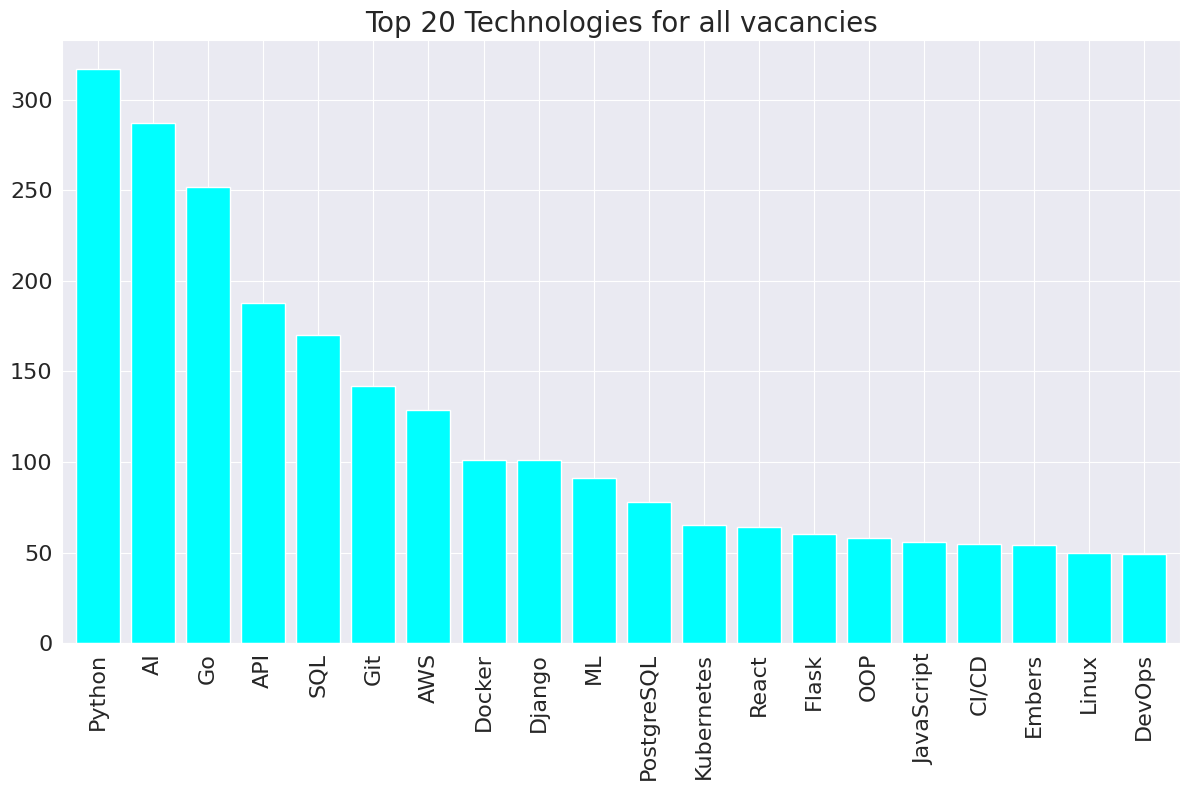

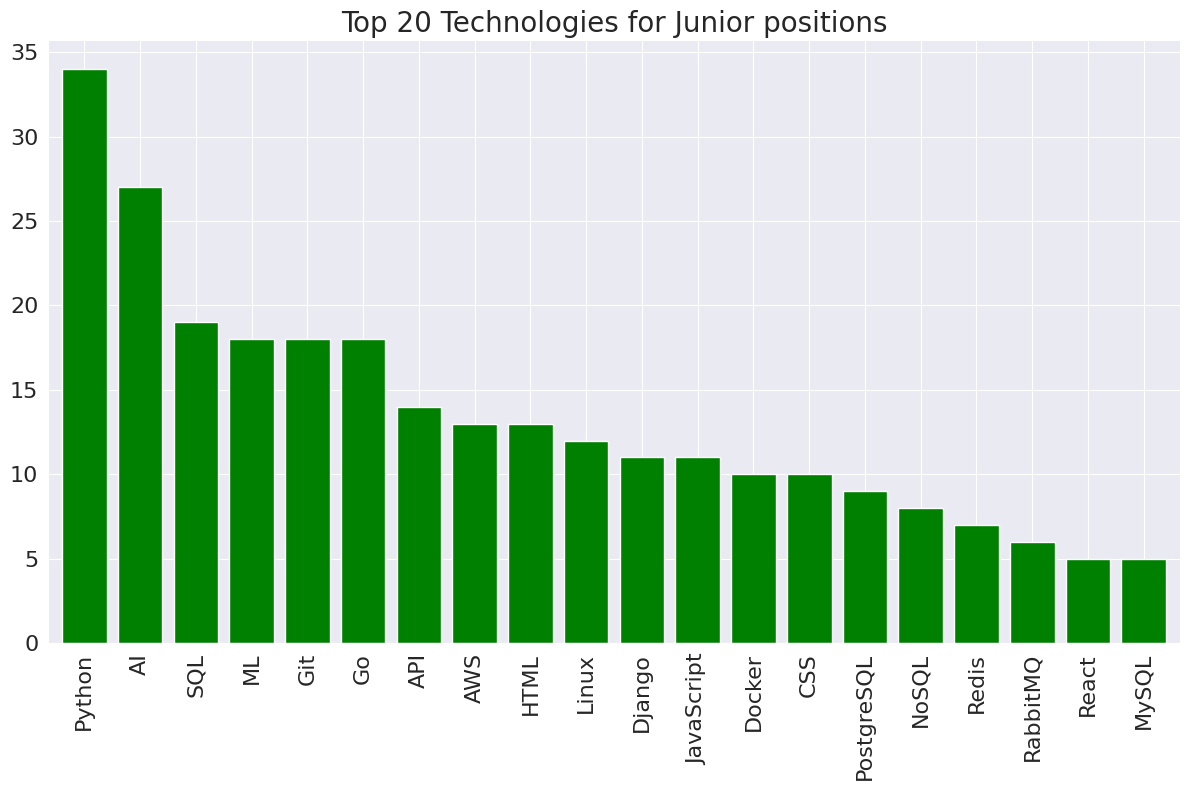

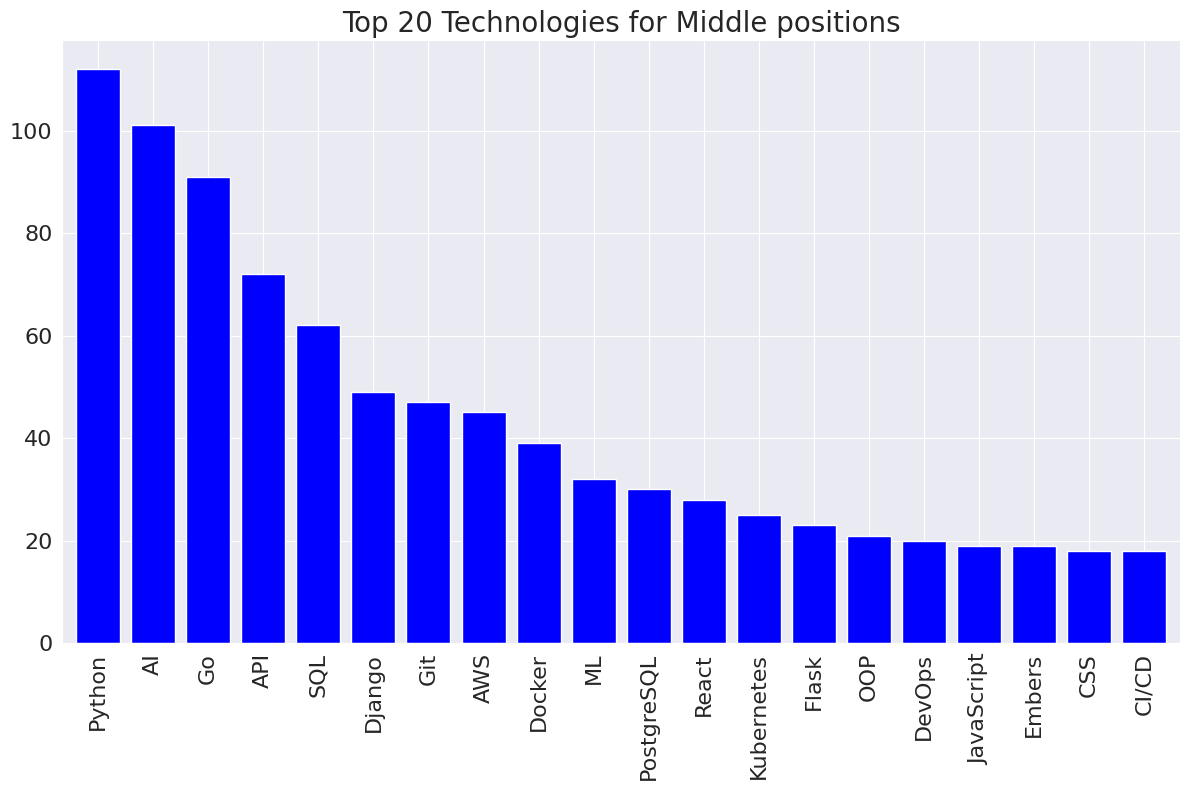

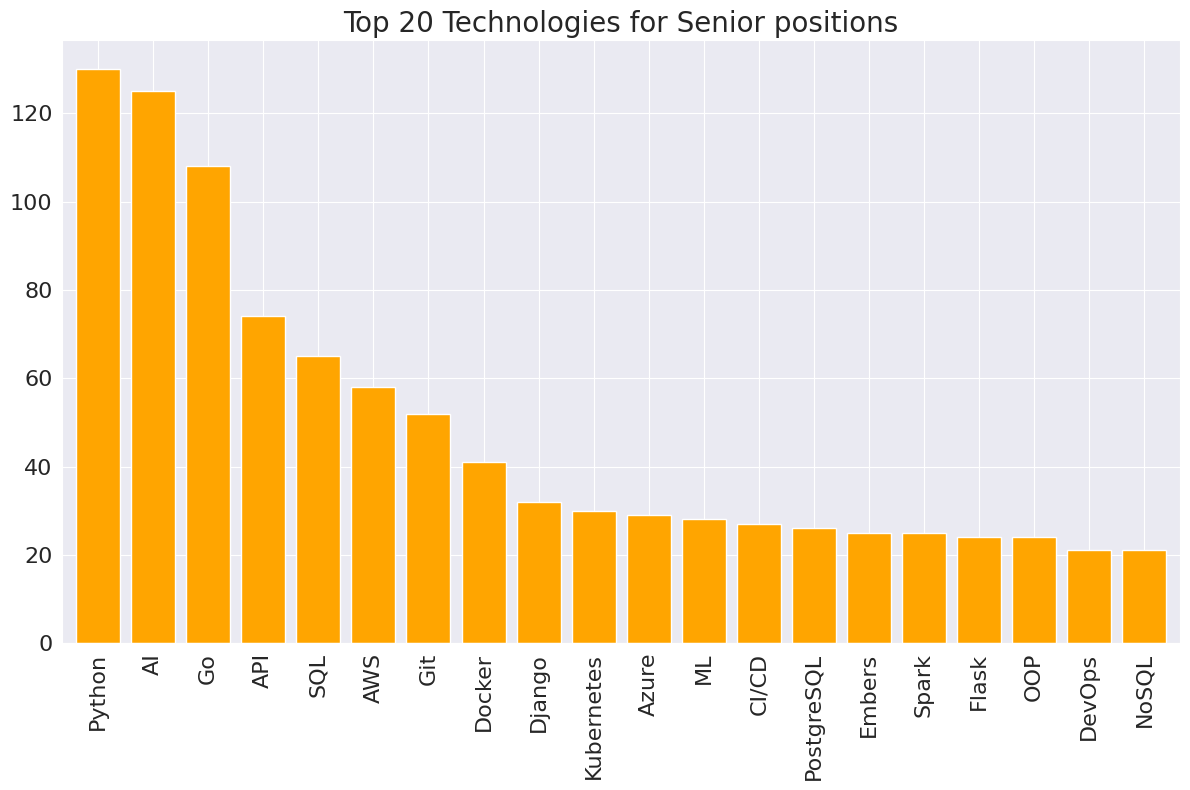

In [3]:
for file, (title, color) in files.items():
    df = pd.read_json(file, lines=True)
    technologies = df["technologies"].explode()
    top_technologies = technologies.value_counts().head(20)

    plt.figure(figsize=(12, 8))

    top_technologies.plot(kind="bar", width=0.8, color=color)

    plt.title(title, fontsize=20)
    plt.xticks(rotation=90, fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("")
    plt.tight_layout()
    image_path = os.path.join(output_dir, "bar", f"{title}-{today}.png")
    os.makedirs(os.path.dirname(image_path), exist_ok=True)
    plt.savefig(image_path, dpi=199, bbox_inches="tight")
    plt.show()

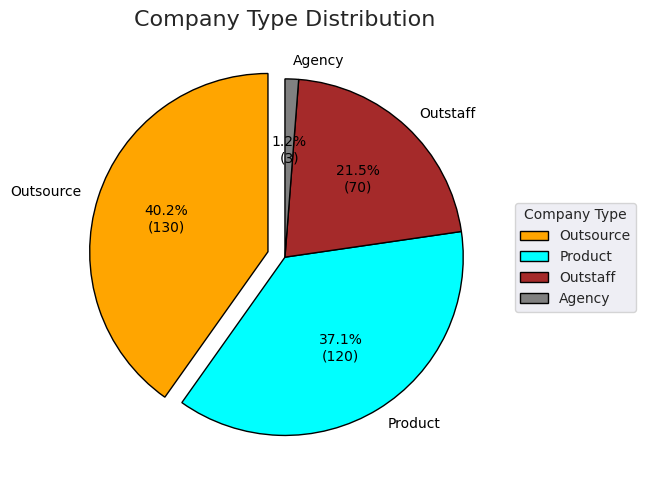

In [4]:
df_all = pd.read_json("vacancies_all.jl", lines=True)
company_counts = df_all["company_type"].value_counts()

types = company_counts.index.tolist()
data = company_counts.values.tolist()
explode = (0.1, 0.0, 0.0, 0.0)
colors = ("orange", "cyan", "brown", "grey")

def func(pct, allvalues):
    absolute = int(pct / 100. * np.sum(allvalues))
    return "{:.1f}%\n({:d})".format(pct, absolute)

fig, ax = plt.subplots(figsize=(15, 5))
wedges, texts, autotexts = ax.pie(data,
                                  autopct=lambda pct: func(pct, data),
                                  explode=explode,
                                  labels=types,
                                  colors=colors,
                                  startangle=90,
                                  wedgeprops={"linewidth": 1, "edgecolor": "black"},
                                  textprops={"color": "black"})
ax.legend(
    wedges,
    types,
    title="Company Type",
    loc="center left",
    bbox_to_anchor=(1, 0, 0.5, 1)
)
ax.set_title("Company Type Distribution", fontsize=16)

plt.tight_layout()
image_path = os.path.join(output_dir, "pie", f"company_type-{today}.png")
os.makedirs(os.path.dirname(image_path), exist_ok=True)
plt.savefig(image_path, dpi=199, bbox_inches="tight")
plt.show()



            experience    salary     views  applicants        AI       API   
experience    1.000000  0.347682 -0.345619   -0.311716  0.021825 -0.088532  \
salary        0.347682  1.000000 -0.413839   -0.423990  0.038336 -0.014952   
views        -0.345619 -0.413839  1.000000    0.942610 -0.060707 -0.038709   
applicants   -0.311716 -0.423990  0.942610    1.000000 -0.033392 -0.030593   
AI            0.021825  0.038336 -0.060707   -0.033392  1.000000  0.009488   
...                ...       ...       ...         ...       ...       ...   
Wms           0.096735  0.217153 -0.040276   -0.036662  0.027325  0.060584   
Xml          -0.069528 -0.118079  0.186251    0.091650 -0.223152 -0.100647   
aiohttp      -0.009833  0.068700 -0.003118    0.003538  0.088882 -0.012714   
asyncio       0.143714  0.041280  0.101673    0.071082  0.061859  0.137152   
jQuery       -0.138582 -0.089394  0.085560    0.061821  0.061859  0.064152   

                 AWS     Agile   Airflow  Algorithms  ...      

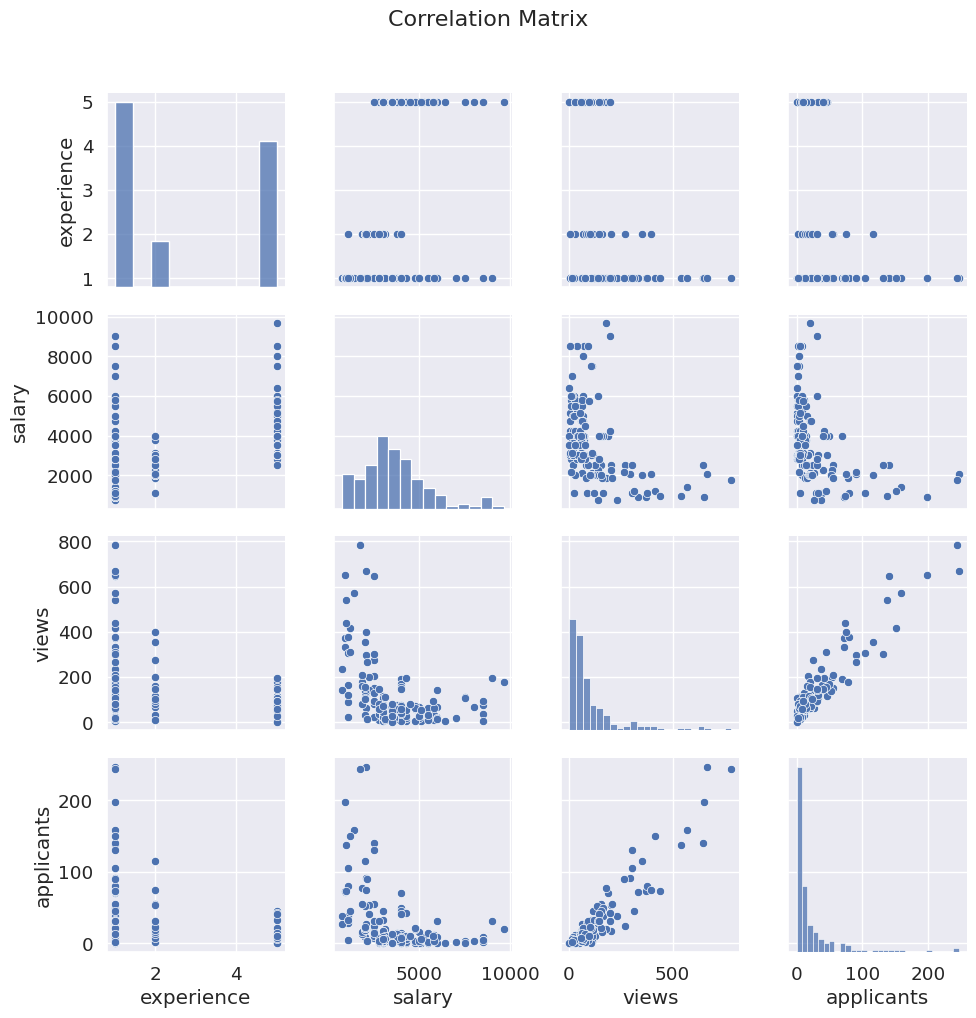

In [8]:
df = pd.read_json("vacancies_all.jl", lines=True)
df = df.dropna(subset=["title", "technologies", "salary", "views", "applicants"])

def extract_experience(title):
    if re.search(r"\bSenior\b", title, re.I):
        return 5
    elif re.search(r"\bMiddle\b", title, re.I):
        return 2
    else:
        return 1

df["experience"] = df["title"].apply(extract_experience)
technologies = df["technologies"].str.join("|").str.get_dummies()
df = pd.concat([df, technologies], axis=1)
correlation = df[["experience", "salary", "views", "applicants"] + list(technologies.columns)].corr()
print(correlation)

sns.set(font_scale=1.2)
pairplot = sns.pairplot(
    df,
    vars=["experience", "salary", "views", "applicants"],
    kind="scatter"
)
pairplot.fig.suptitle("Correlation Matrix", y=1.02, fontsize=16)
plt.tight_layout()

image_path = os.path.join(output_dir, "pairplot", f"pairplot-{today}.png")
os.makedirs(os.path.dirname(image_path), exist_ok=True)
pairplot.savefig(image_path)

plt.show()